# Know your customers

One of the most common applications of KMeans is to get to know your customers. Take a very simple dataset that is Mall Customers to try to discover customer segmentations.

0. Import usuals librairies

In [8]:
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans 
from sklearn.metrics import  silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

1. Import the ```Mall_Customers.csv``` dataset

In [9]:
dataset = pd.read_csv("../12_assets/06_unsupervised_ML/Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
print(dataset.shape[0])
print()

display(dataset.head())
print()

display(dataset.describe(include='all').T)

print("% missing val : ")
display(100*dataset.isnull().sum()/dataset.shape[0])

200



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,200.0,NaN,NaN,NaN,100.5,57.879185,1.0,50.75,100.5,150.25,200.0
Genre,200,2,Female,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,200.0,NaN,NaN,NaN,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,NaN,NaN,NaN,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,NaN,NaN,NaN,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


% missing val : 


CustomerID                0.0
Genre                     0.0
Age                       0.0
Annual Income (k$)        0.0
Spending Score (1-100)    0.0
dtype: float64

2. Remove the "CustomerID" variable from your dataset. 

In [11]:
to_drop = ['CustomerID']

dataset = dataset.drop(columns=to_drop)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


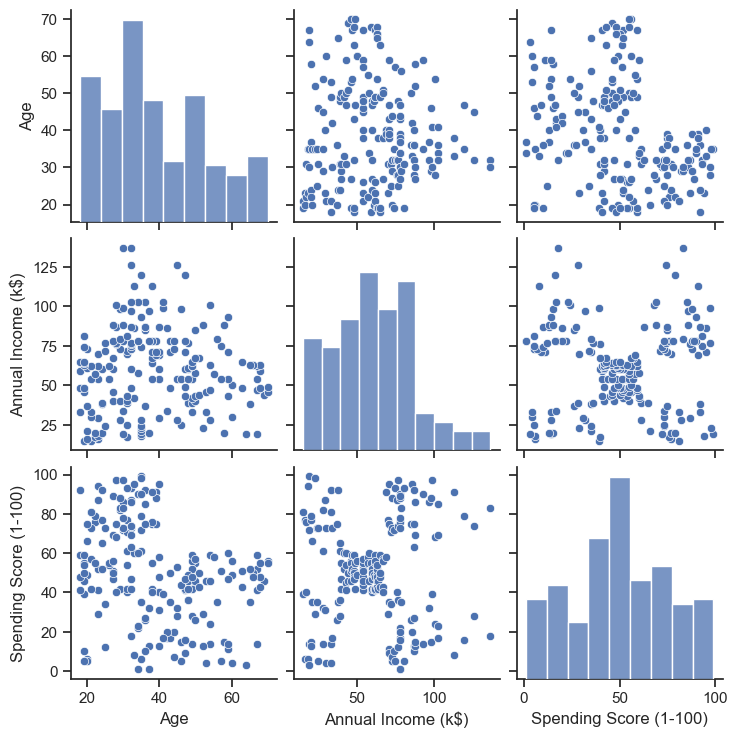

In [13]:
sns.set(style="ticks")
_ = sns.pairplot(dataset)

3. Make all the preprocessings

In [ ]:
numeric_features      = dataset.select_dtypes(include="number").columns
categorical_features  = dataset.select_dtypes(exclude="number").columns

numeric_transformer = Pipeline(
  steps=[
  # ("imputer_num", SimpleImputer(strategy="median")),
  # ("imputer_num", KNNImputer()),
  ("scaler_num" , StandardScaler()),
    ]
  )



categorical_transformer = Pipeline(
  steps=[
      # ("imputer_cat", SimpleImputer(strategy="most_frequent")),  
      ("encoder_cat", OneHotEncoder(drop="first")),                 
    ]
  )

preprocessor = ColumnTransformer(
  transformers=[
      ("num", numeric_transformer,     numeric_features),
      ("cat", categorical_transformer, categorical_features),
    ]
  )


In [ ]:
print(dataset.head())
X = preprocessor.fit_transform(dataset)
print(X[0:5, :].round(3))

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
[[-1.425 -1.739 -0.435  1.   ]
 [-1.281 -1.739  1.196  1.   ]
 [-1.353 -1.701 -1.716  0.   ]
 [-1.138 -1.701  1.04   0.   ]
 [-0.563 -1.663 -0.396  0.   ]]


4. We are going to build our clusters, but to do so, we need to know the optimum number of clusters we need. First use the ```Elbow``` method to see if we can see how many we need to take as a value for ```k```.

In [ ]:
wcss =  []
for i in range (2, 15): 
    km = KMeans(n_clusters = i, n_init='auto', random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
print(wcss)

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Window

[438.52241155677746, 346.03755477146717, 254.36171423484495, 227.01672798042065, 194.0042419361099, 183.0284960819348, 151.03482636968909, 145.7922195039509, 141.23944897726113, 131.22474565700696, 116.45798452998244, 112.54458292997516, 103.3983947255772]


c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [ ]:
fig = px.line(x = range(2,15), y = wcss)
fig.show()

5. Then use the _Silhouette_ method to see if we can refine our hypothesis for ```k```.

In [ ]:
silhouette_scores = []
for i in range (2,15): 
    km = KMeans(n_clusters=i, random_state=0, n_init='auto')
    km.fit(X)
    silhouette_scores.append(silhouette_score(X, km.predict(X)))

print(silhouette_scores)

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Window

[0.3031976564160757, 0.3120911967450968, 0.35044061449694197, 0.3101586031776234, 0.3148516280991192, 0.28810794551986924, 0.33200051039371054, 0.3019901116126307, 0.30015660334449235, 0.31755144809441693, 0.33161681893933886, 0.33330591936797177, 0.3276840941369214]


In [ ]:
fig = px.bar(x = range(2,15), y = silhouette_scores)
fig.show()

6. Next, we will take $K=6$ clusters. Apply the KMeans to your dataset.

In [ ]:
kmeans = KMeans(n_clusters= 6, n_init='auto')
kmeans.fit(X)

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=6, n_init='auto')

In [ ]:
dataset.loc[:,'Groupe'] = kmeans.predict(X)
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Groupe
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


7. Let's create a graph that will allow us to visualize each of the clusters. We will first take the ```Spending Score``` as the ordinate and the ```Annual Income``` as the abscissa. 

In [ ]:
fig = px.scatter(dataset, x = 'Annual Income (k$)', y = "Spending Score (1-100)", color = "Groupe")
fig.show()

8. We have a nice visualization with a nice cluster separation. Look this time at the variable ```Age``` in relation to the ```Spending Score```. What do you notice?

In [ ]:
fig = px.scatter(dataset, x = 'Age', y = "Spending Score (1-100)", color = "Groupe")
fig.show()

----> This time clusters are definitely less visible. 

9. Finally, make a 3d scatter plot of your clusters by using all the quantitative features

In [ ]:
fig = px.scatter_3d(dataset, x = 'Annual Income (k$)', y = "Spending Score (1-100)", z = 'Age', color = "Groupe")
fig.show()